# Looi Kah Fung_Lab 7 Clustering_P-COM0049/22

CRISP-DM Methodology 
#Business understanding
We would like to categorize the cars into several groups based on how far a car can travel if you put just one gallon of petrol (mpg) in its tank.

#Data understanding
Attributes Information:
• mpg (miles per gallon): continuous
• cylinders: multi-valued discrete
• displacement: continuous
• horsepower: continuous
• weight: continuous
• acceleration: continuous
• model year: multi-valued discrete
• origin: multi-valued discrete
• car name: string (unique for each instance)

https://t4tutorials.com/attributes-types-in-data-mining/

In [1]:
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 

FileNotFoundError: [Errno 2] No such file or directory: 'auto_mpg'

In [33]:
df= pd.read_csv("auto_mpg.csv", delim_whitespace=True)

In [34]:
#describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.070352,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.374531,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [35]:
#print the 1st 5 rows 
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [36]:
#retrieve the preliminary info of the dataset 
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu

In [37]:
# The size of the dataset
df.shape

(398, 9)

In [48]:
# sum of null data based on attributes 
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [49]:
#Excluse last feature "car_name" due to str
x = df.loc[:,["mpg","displacement"]]
print(x)

      mpg  displacement
0    18.0         307.0
1    15.0         350.0
2    18.0         318.0
3    16.0         304.0
4    17.0         302.0
..    ...           ...
393  27.0         140.0
394  44.0          97.0
395  32.0         135.0
396  28.0         120.0
397  31.0         119.0

[398 rows x 2 columns]


#Data Preparation 

#Feature Scaling 
Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
--> normalize() 
--> minmaxscaler()
https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
https://www.digitalocean.com/community/tutorials/normalize-data-in-python

In [54]:
#Normalize across the dataset, axis=0, the normalization takes place along the column
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()
Normalize = scaler.fit_transform(x)
names = x.columns
Normalize_df = pd.DataFrame(Normalize, columns=names)
print(Normalize_df.head(5))

        mpg  displacement
0  0.239362      0.617571
1  0.159574      0.728682
2  0.239362      0.645995
3  0.186170      0.609819
4  0.212766      0.604651


In [55]:
Normalize_df.shape

(398, 2)

In [56]:
#subset of the dataset consists of mpg and displacement 
X=Normalize_df["mpg"]
y=Normalize_df["displacement"]

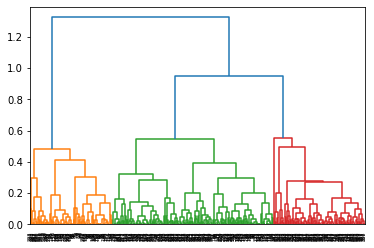

In [57]:
# Create a dendrogram from scipy (to see the hierarchical relationship between, the clusters)
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(Normalize_df, method='complete', metric='euclidean')
dendrogram(linked, orientation='top', distance_sort='ascending',show_leaf_counts=False)
plt.show()

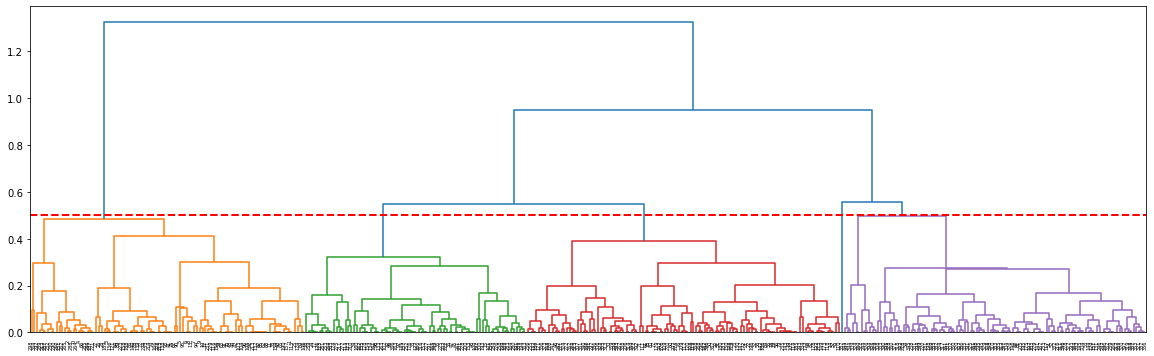

In [58]:
# Specify the cut threshold so that data will be partitioned into the desired clusters
plt.figure(figsize=(20,6))
dendrogram(linked, orientation='top', distance_sort='ascending',show_leaf_counts=False, color_threshold=0.5)
plt.axhline(y=0.5, c='r', linestyle='--', linewidth=2)
# we can draw a horizontal line to cut the dendrogram
plt.show()

#Clustering using Hierarchical Agglomerative Clustering

In [64]:
# Perform the customer dataset using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward') # by default ward linkage & euclidean metric
pred = model.fit_predict(Normalize_df)

Text(0, 0.5, 'displacement')

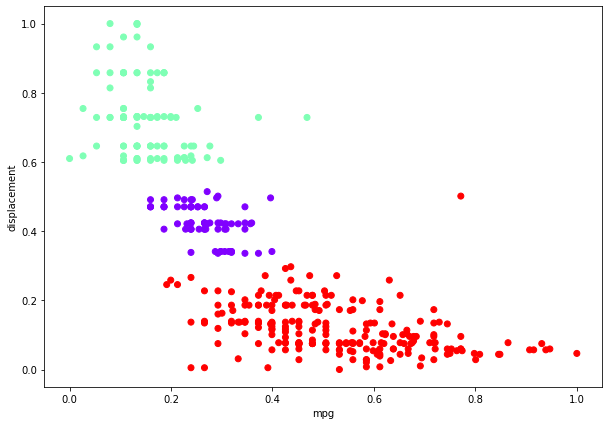

In [66]:
# Let's plot the clusters to see how actually our data has been clustered
plt.figure(figsize=(10, 7))
plt.scatter(X, y, c=pred, cmap='rainbow_r')
plt.xlabel('mpg')
plt.ylabel('displacement')

Study materials 
https://www.geeksforgeeks.org/difference-between-k-means-and-hierarchical-clustering/
https://medium.com/@namanbhandari/agglomerative-clustering-vs-k-means-clustering-766a90b37dc0
https://datascience.stackexchange.com/questions/91182/when-should-we-choose-agglomerative-clustering-over-k-means-clustering